In [1]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df_train = pd.read_csv('./data/train_data.csv')
df_train.shape

(7160, 14)

In [5]:
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
df_train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [8]:
# let's check unique values
columns=df_train.columns
for col in columns:
    print(col,':\n',df_train[col].unique())
    print(df_train[col].value_counts())
    print('\n',20*'**','\n')

Customer Id :
 ['H14663' 'H2037' 'H3802' ... 'H6204' 'H6537' 'H7470']
H14663    1
H19182    1
H1571     1
H15027    1
H15026    1
         ..
H5025     1
H19098    1
H16571    1
H16570    1
H7470     1
Name: Customer Id, Length: 7160, dtype: int64

 **************************************** 

YearOfObservation :
 [2013 2015 2014 2012 2016]
2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

 **************************************** 

Insured_Period :
 [1.         0.24109589 0.84383562 0.95628415 0.99726776 0.08493151
 0.85753425 0.29589041 0.         0.78142077 0.91506849 0.98630137
 0.16164384 0.99726027 0.09589041 0.66575343 0.89315069 0.02459016
 0.58082192 0.83287671 0.26027397 0.7479452  0.41803279 0.10410959
 0.76986301 0.02465753 0.47671233 0.86575342 0.55464481 0.16393443
 0.44808743 0.50273224 0.75136612 0.08196721 0.46849315 0.79726027
 0.31506849 0.59452055 0.74863388 0.17534247 0.11780822 0.12054795
 0.49589041 0.91530055 0

In [9]:
df_train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [10]:
df_train.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

C:\Users\USER\AppData\Local\Temp\ipykernel_9328\2988913750.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


array([[<Axes: title={'center': 'YearOfObservation'}>,
        <Axes: title={'center': 'Insured_Period'}>,
        <Axes: title={'center': 'Residential'}>],
       [<Axes: title={'center': 'Building Dimension'}>,
        <Axes: title={'center': 'Building_Type'}>,
        <Axes: title={'center': 'Date_of_Occupancy'}>],
       [<Axes: title={'center': 'Claim'}>, <Axes: >, <Axes: >]],
      dtype=object)

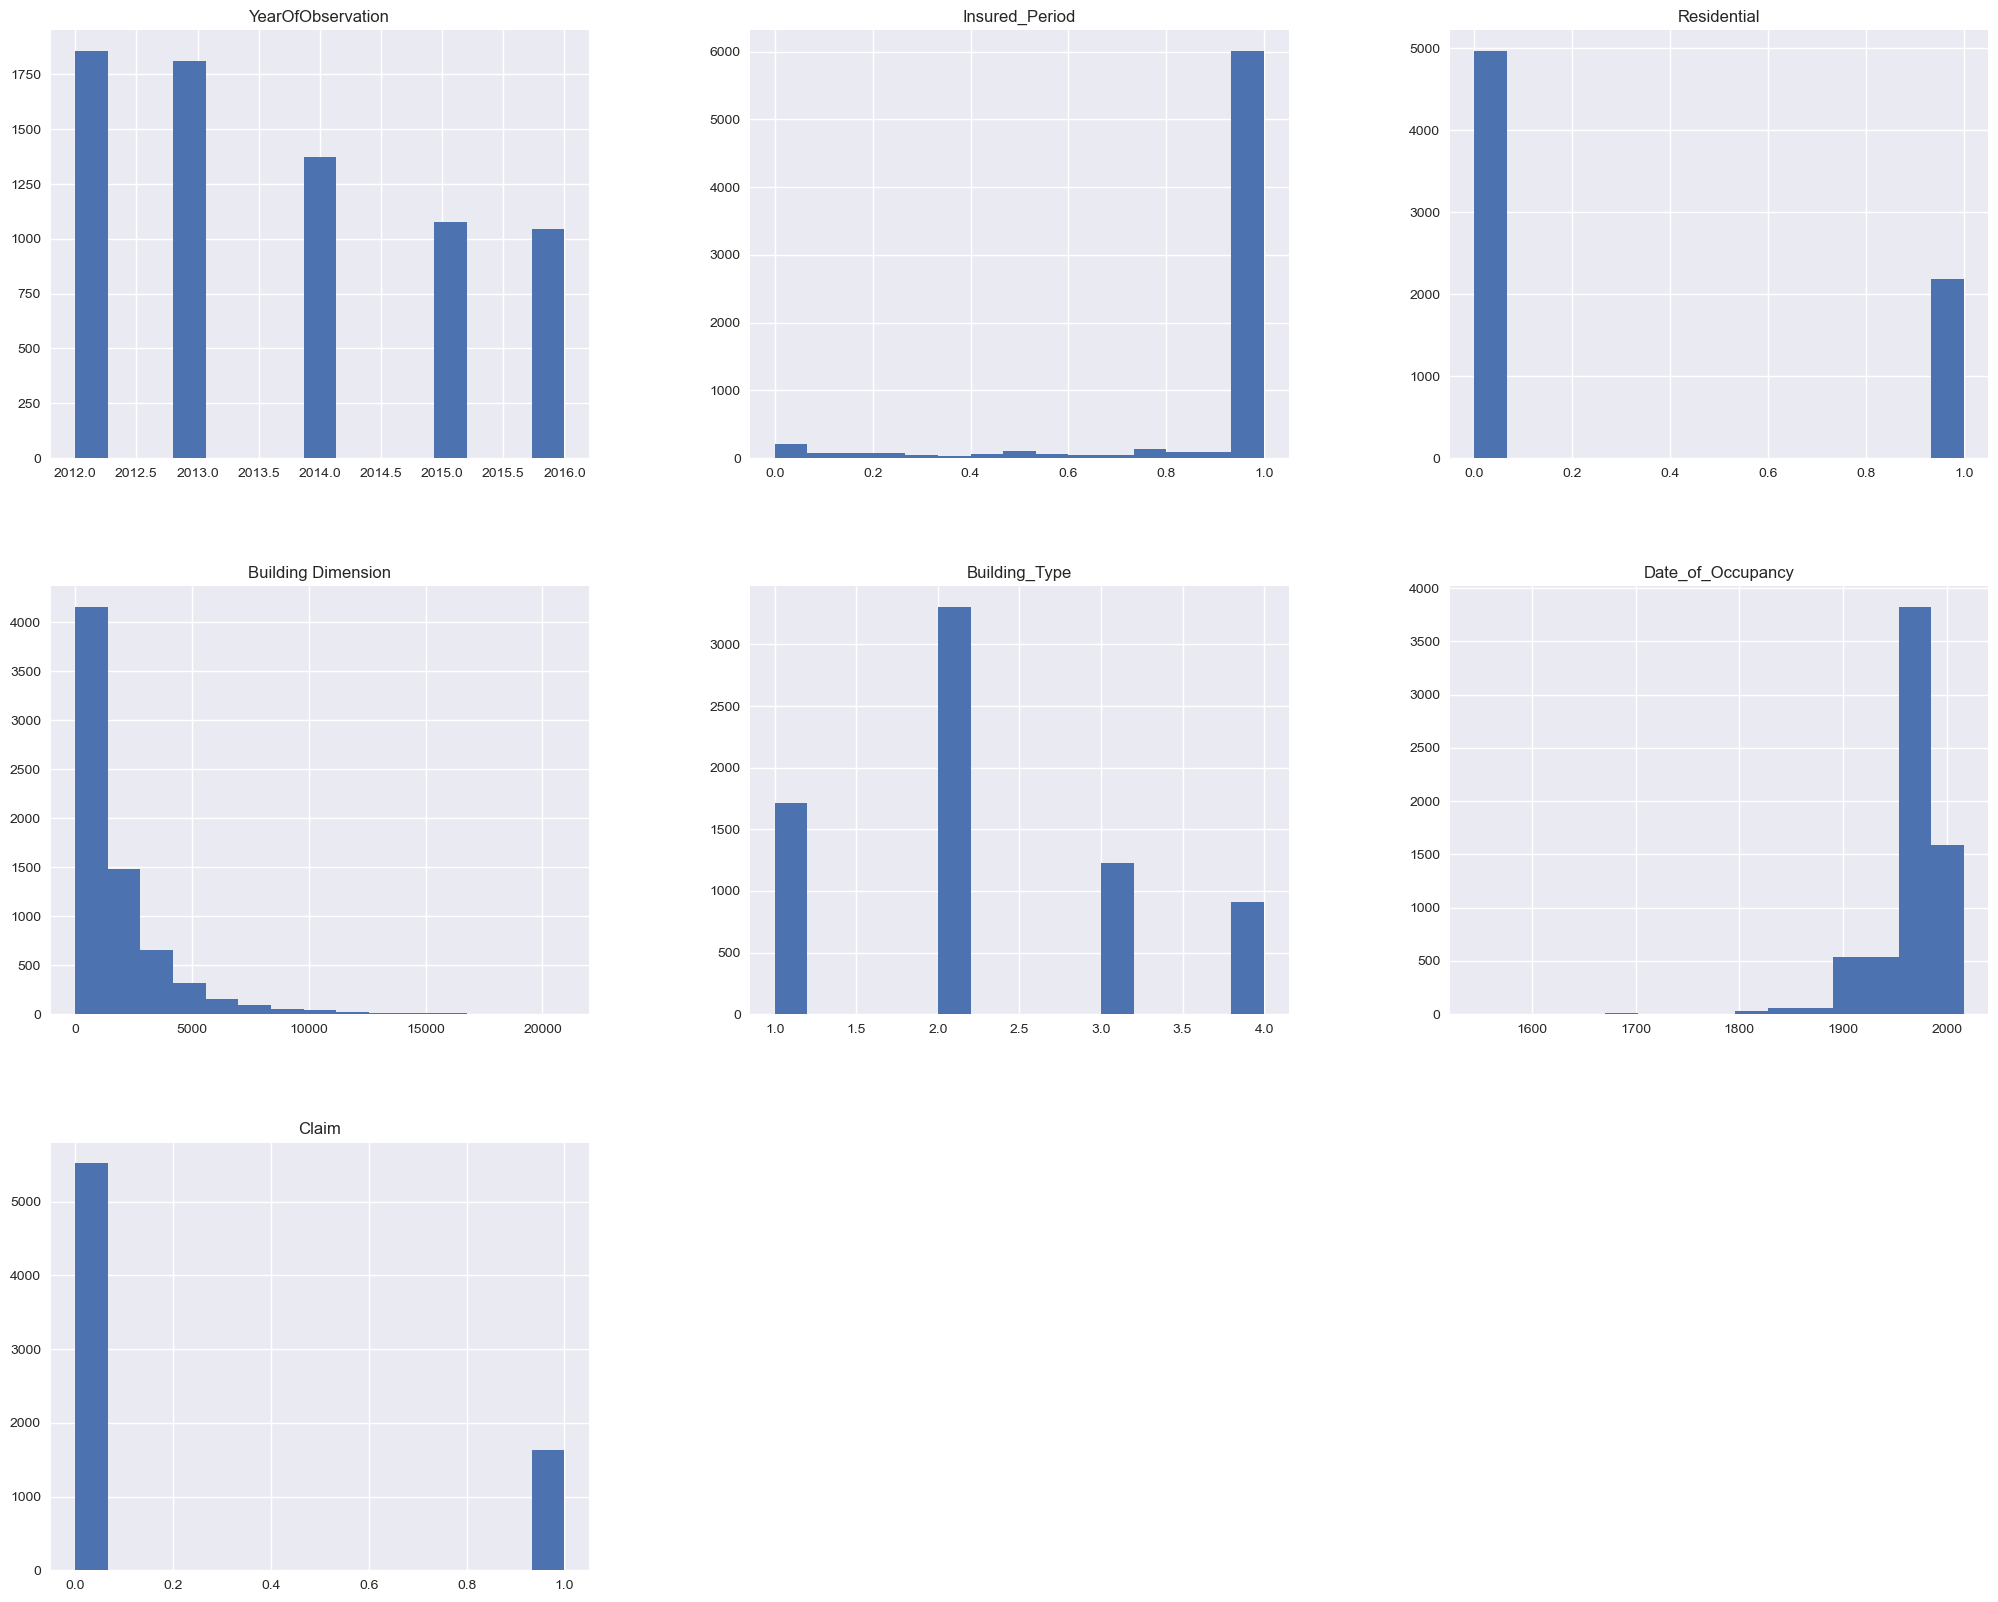

In [11]:
plt.style.use("seaborn")
df_train.hist(figsize=(25,20), bins=15)

In [12]:
df_train.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [22]:
df_train = df_train.fillna(df_train.mode().iloc[0])

In [23]:
df_train.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

### EDA

In [14]:
df_train['Claim'].unique()

array([0, 1], dtype=int64)

In [15]:
df_train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

<Axes: xlabel='Claim', ylabel='count'>

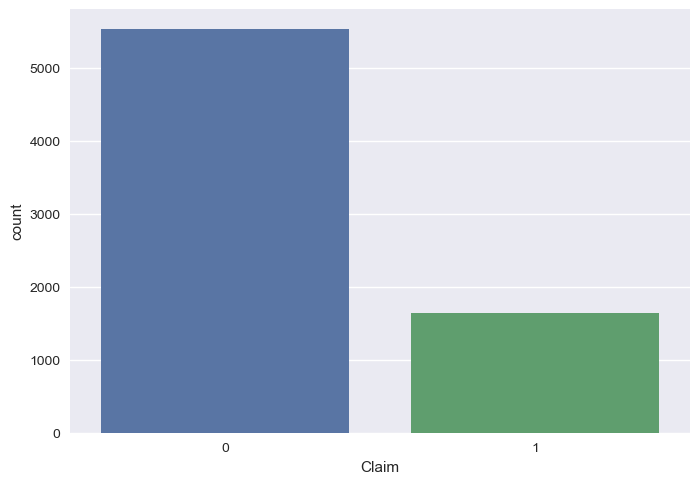

In [16]:
sns.countplot(x="Claim", data=df_train)

<Axes: ylabel='Claim'>

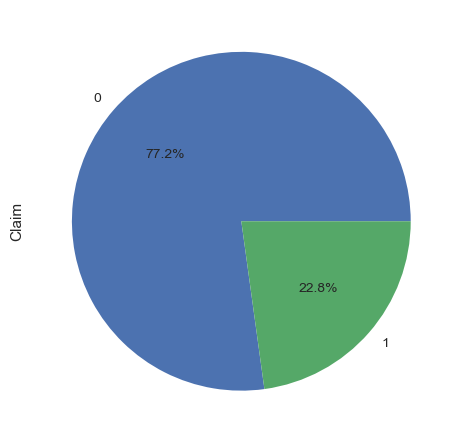

In [17]:
df_train['Claim'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [18]:
df_train['YearOfObservation'].unique()

array([2013, 2015, 2014, 2012, 2016], dtype=int64)

In [19]:
df_train['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

<Axes: xlabel='YearOfObservation', ylabel='count'>

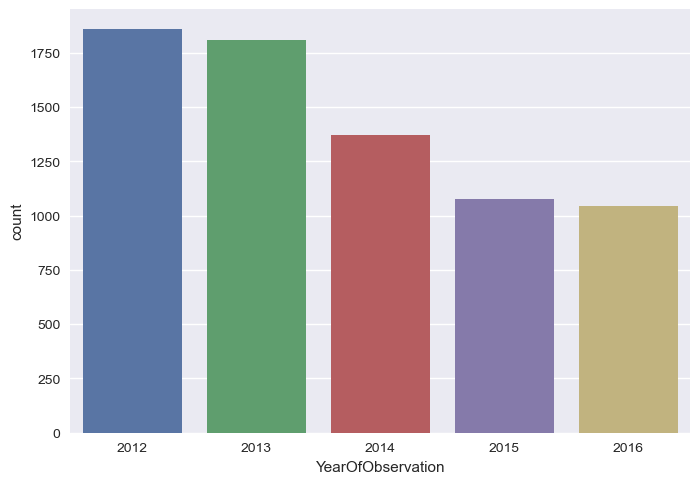

In [20]:
sns.countplot(x="YearOfObservation", data=df_train)

<Axes: ylabel='YearOfObservation'>

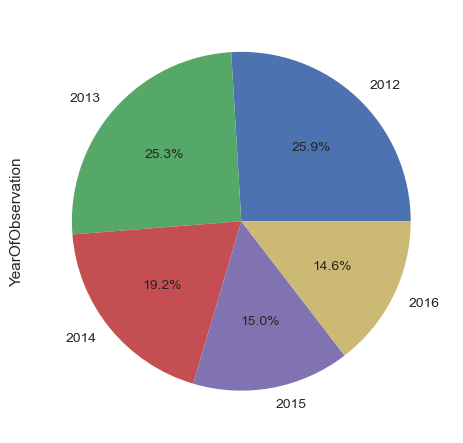

In [21]:
df_train['YearOfObservation'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [25]:
df_train['Residential'].unique()

array([0, 1], dtype=int64)

In [26]:
df_train['Residential'].value_counts()

0    4973
1    2187
Name: Residential, dtype: int64

<Axes: xlabel='Residential', ylabel='count'>

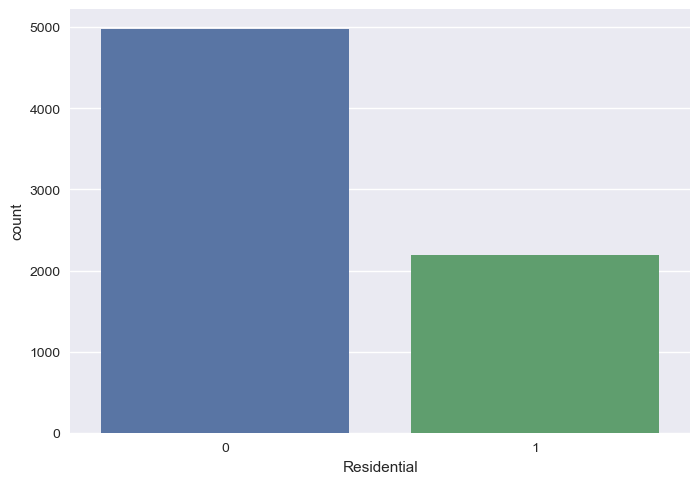

In [27]:
sns.countplot(x="Residential", data=df_train)

<Axes: ylabel='Residential'>

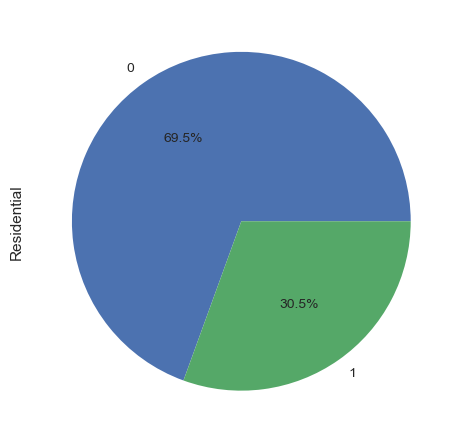

In [28]:
df_train['Residential'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [29]:
df_train['Garden'].unique()

array(['V', 'O'], dtype=object)

In [30]:
df_train['Garden'].value_counts()

O    3609
V    3551
Name: Garden, dtype: int64

<Axes: xlabel='Garden', ylabel='count'>

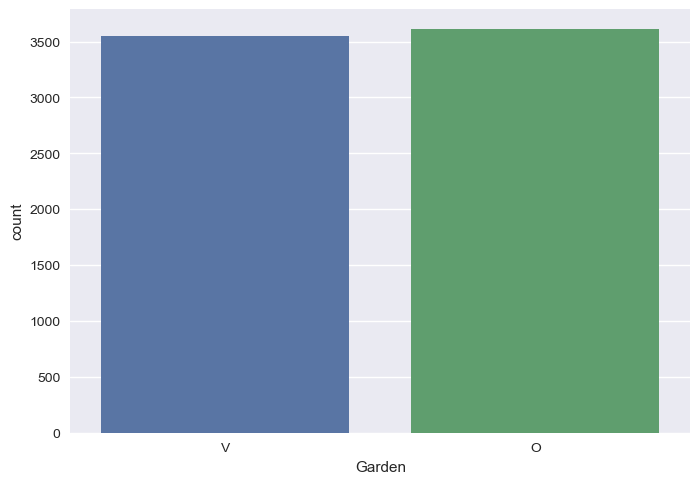

In [31]:
sns.countplot(x="Garden", data=df_train)

<Axes: ylabel='Garden'>

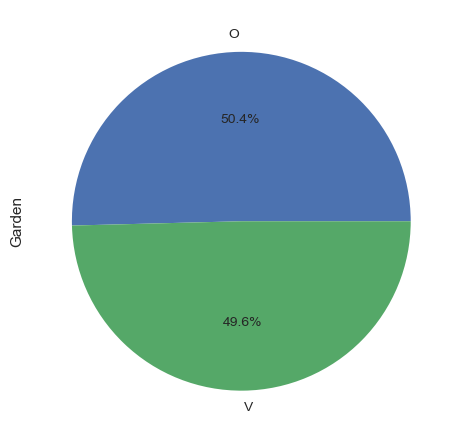

In [32]:
df_train['Garden'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [33]:
df_train['Building_Type'].unique()

array([1, 2, 4, 3], dtype=int64)

In [34]:
df_train['Building_Type'].value_counts()

2    3305
1    1716
3    1230
4     909
Name: Building_Type, dtype: int64

<Axes: xlabel='Building_Type', ylabel='count'>

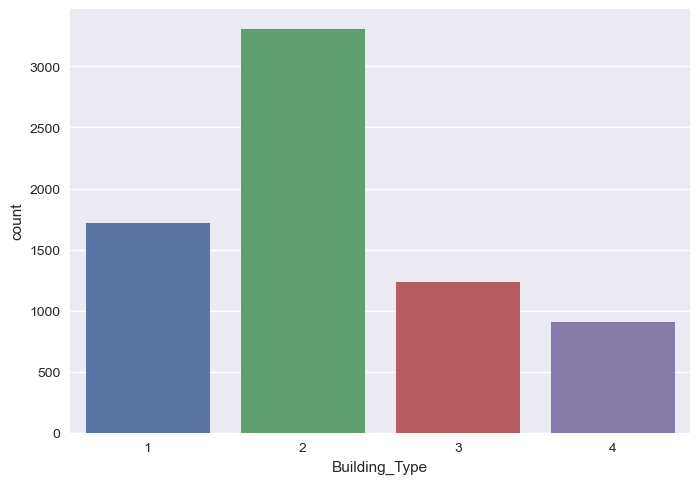

In [35]:
sns.countplot(x="Building_Type", data=df_train)

<Axes: ylabel='Building_Type'>

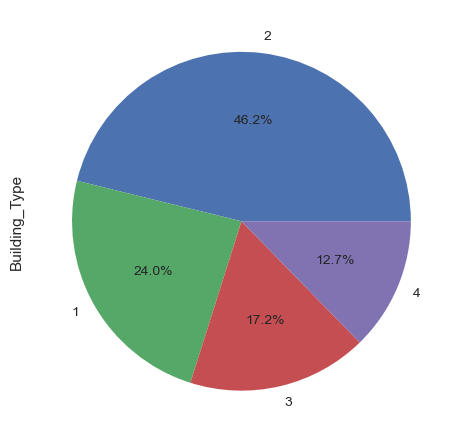

In [36]:
df_train['Building_Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [37]:
df_train['Building_Painted'].unique()

array(['N', 'V'], dtype=object)

In [38]:
df_train['Building_Painted'].value_counts()

V    5382
N    1778
Name: Building_Painted, dtype: int64

<Axes: xlabel='Building_Painted', ylabel='count'>

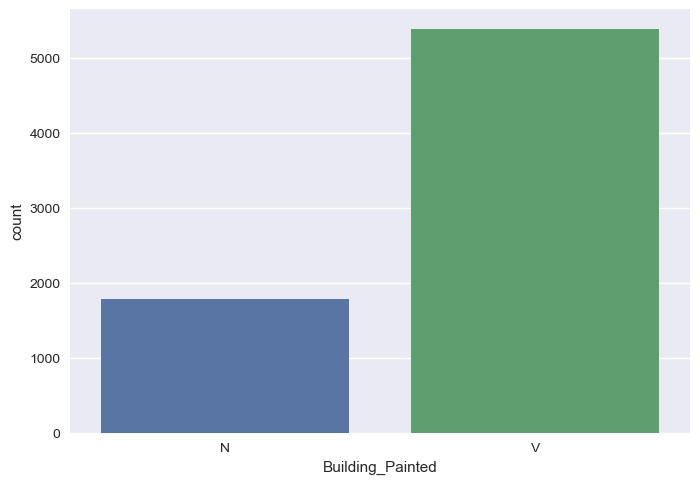

In [39]:
sns.countplot(x="Building_Painted", data=df_train)

<Axes: ylabel='Building_Painted'>

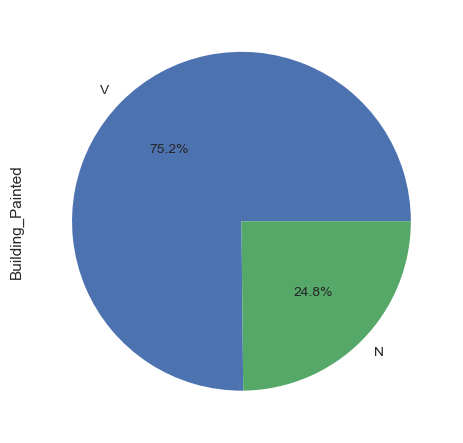

In [40]:
df_train['Building_Painted'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [41]:
df_train['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [42]:
df_train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

<Axes: xlabel='NumberOfWindows', ylabel='count'>

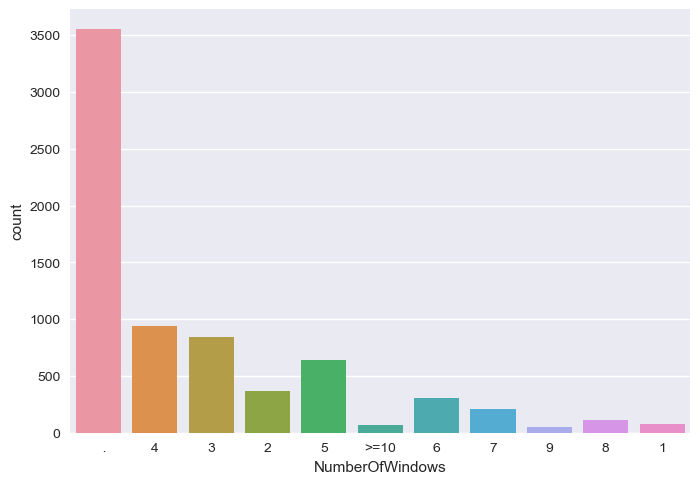

In [43]:
sns.countplot(x="NumberOfWindows", data=df_train)

<Axes: ylabel='NumberOfWindows'>

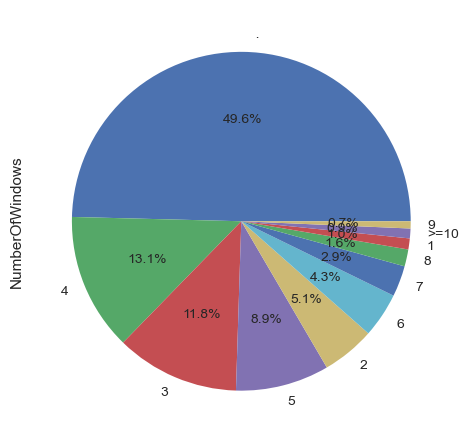

In [44]:
df_train['NumberOfWindows'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [49]:
from sklearn.preprocessing import LabelEncoder

Lb = LabelEncoder()

df_train['Building_Painted']  = Lb.fit_transform(df_train['Building_Painted'])
df_train['Building_Fenced']  = Lb.fit_transform(df_train['Building_Fenced'])
df_train['Garden']  = Lb.fit_transform(df_train['Garden'])
df_train['Settlement']  = Lb.fit_transform(df_train['Settlement'])
df_train['NumberOfWindows']  = Lb.fit_transform(df_train['NumberOfWindows'])
df_train['Geo_Code']  = Lb.fit_transform(df_train['Geo_Code'])

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   int32  
 5   Building_Fenced     7160 non-null   int32  
 6   Garden              7160 non-null   int32  
 7   Settlement          7160 non-null   int32  
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   int32  
 12  Geo_Code            7160 non-null   int32  
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int32(6), int64(4), object(1)
memory usage: 615.4+ KB


In [52]:
df_train.drop(['Customer Id'],axis = 1,inplace = True)

In [53]:
df_train.corr()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
YearOfObservation,1.000000,0.025434,-0.040391,0.056881,-0.120373,-0.120238,-0.120103,0.012544,0.005490,-0.027007,0.102345,0.007718,-0.016367
Insured_Period,0.025434,1.000000,-0.037620,-0.037077,-0.047091,-0.047196,-0.046504,0.010037,-0.017811,0.003029,0.042585,0.004195,0.088715
Residential,-0.040391,-0.037620,1.000000,-0.032927,-0.082448,-0.082263,-0.082684,0.055718,0.334039,-0.042733,0.128818,0.318196,0.063509
Building_Painted,0.056881,-0.037077,-0.032927,1.000000,-0.574757,-0.574919,-0.575081,0.086416,-0.048541,-0.091574,0.492943,0.014160,0.029857
Building_Fenced,-0.120373,-0.047091,-0.082448,-0.574757,1.000000,0.999721,0.999441,-0.140703,-0.020430,0.155159,-0.859150,-0.054830,-0.051657
Garden,-0.120238,-0.047196,-0.082263,-0.574919,0.999721,1.000000,0.999721,-0.140659,-0.020375,0.155072,-0.860018,-0.054856,-0.052171
Settlement,-0.120103,-0.046504,-0.082684,-0.575081,0.999441,0.999721,1.000000,-0.140479,-0.020320,0.155105,-0.859778,-0.055162,-0.052019
Building Dimension,0.012544,0.010037,0.055718,0.086416,-0.140703,-0.140659,-0.140479,1.000000,0.010269,0.201562,0.291174,0.009046,0.295423
Building_Type,0.005490,-0.017811,0.334039,-0.048541,-0.020430,-0.020375,-0.020320,0.010269,1.000000,-0.142708,0.113084,0.285987,0.112168
Date_of_Occupancy,-0.027007,0.003029,-0.042733,-0.091574,0.155159,0.155072,0.155105,0.201562,-0.142708,1.000000,-0.142308,0.008328,0.019122


(13.5, -0.5)

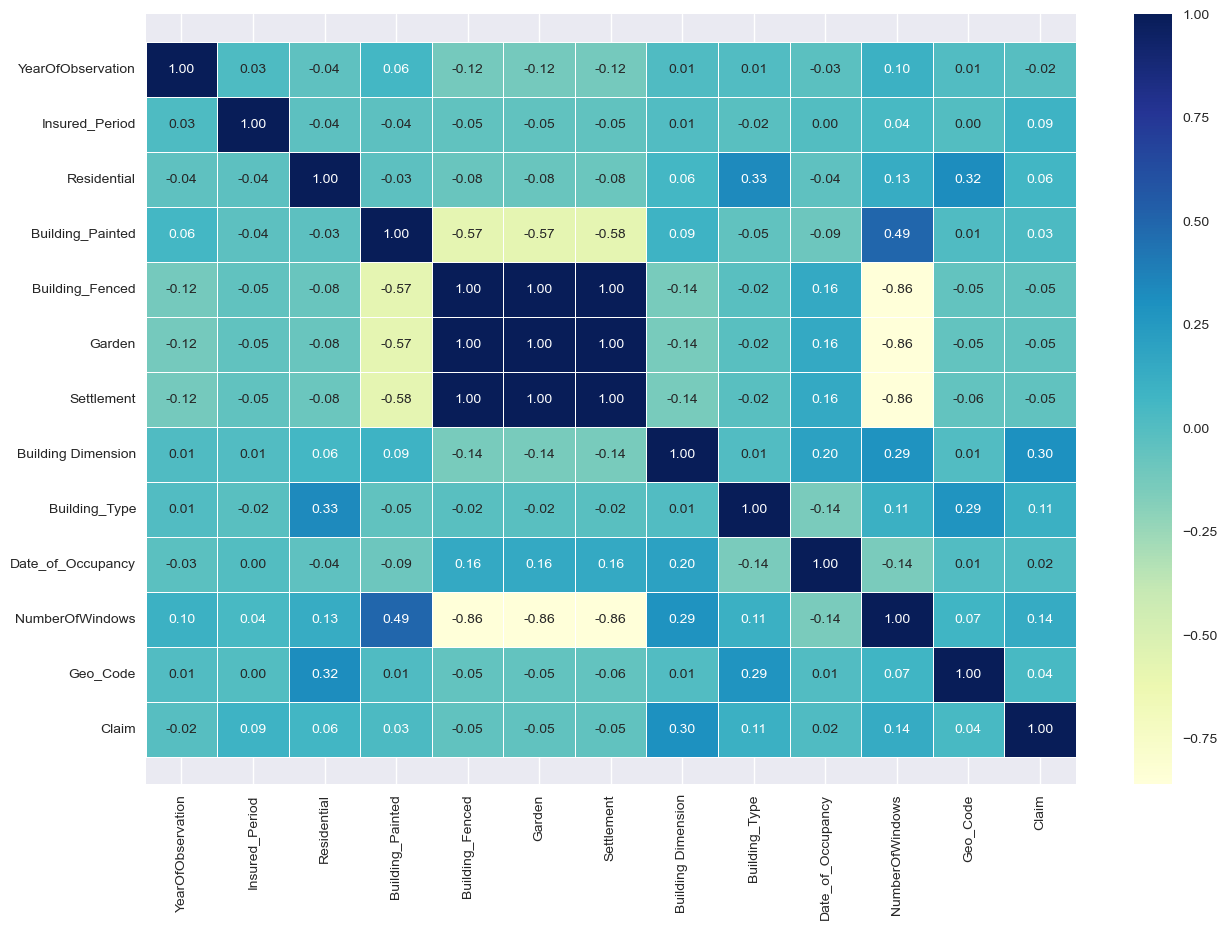

In [54]:
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)